<a href="https://colab.research.google.com/github/Mhtag/tensorflow/blob/main/04_neuralnetwork_multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# show the first training example

print(f'training example:\n{train_data[0]}\n')
print(f'training label:\n{train_labels[0]}')

training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

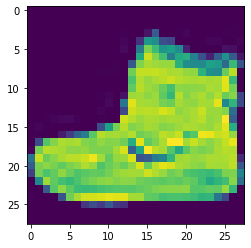

In [5]:
plt.imshow(train_data[0])

In [6]:
# create a small list 
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_name)

10

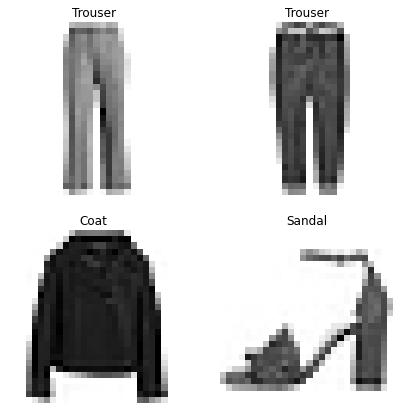

In [7]:
# plot multiple random images of mnist dataset
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2 ,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

* if label are one hot encoded use CategoricalCrossentropy() as the loss function and if label is in integer format use SparseCategoricalCrossentropy().

In [8]:
train_data[0].shape

(28, 28)

In [9]:
# our data needs to be flatten
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [10]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

non_norm_history = model_1.fit(train_data, train_labels,
                               epochs=10,
                               validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accuracy:

In [11]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Normalized data

Neural Networks prefer data to be scaled (or normalized), this means they likely to have the numbers between 0 and 1.

In [12]:
# check the max and min value of our train data
train_data.max(), train_data.min()

(255, 0)

In [13]:
# we can get our training & testing data betweeb 0 and 1 by dividing it with maximum

train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

# Check the mon and max value of scaled trained data
train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

In [14]:
tf.random.set_seed(42)

# Craete a model

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

norm_history = model_2.fit(train_data_norm, train_labels, epochs=10,
            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

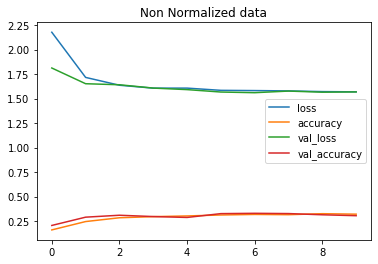

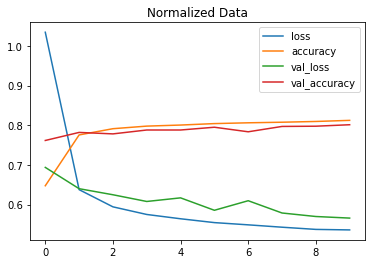

In [15]:
pd.DataFrame(non_norm_history.history).plot(title='Non Normalized data')

pd.DataFrame(norm_history.history).plot(title='Normalized Data')

## Finding the ideal Learning rate

In [17]:
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the Learning rate call back
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_3.fit(train_data_norm, train_labels, epochs=40,
            validation_data=(test_data_norm,test_labels),
            callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7294 - accuracy: 0.7347 - val_loss: 0.5320 - val_accuracy: 0.8138
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4810 - accuracy: 0.8330 - val_loss: 0.5678 - val_accuracy: 0.8084
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4486 - accuracy: 0.8439 - val_loss: 0.4838 - val_accuracy: 0.8258
Epoch 4/40
1349/1875 [====================>.........] - ETA: 1s - loss: 0.4259 - accuracy: 0.8511

KeyboardInterrupt: ignored

In [ ]:
# plot the learning rate decay rate

lre = find_lr_history.history['lr']
plt.semilogx(lre, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning Rate')

In [18]:
# lets refit the model with ideal lerning rate

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(50, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_norm, train_labels, epochs=20,
            validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5192 - accuracy: 0.8190 - val_loss: 0.4446 - val_accuracy: 0.8413
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3940 - accuracy: 0.8599 - val_loss: 0.4746 - val_accuracy: 0.8375
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3592 - accuracy: 0.8718 - val_loss: 0.4071 - val_accuracy: 0.8510
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8794 - val_loss: 0.3981 - val_accuracy: 0.8586
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3224 - accuracy: 0.8826 - val_loss: 0.3865 - val_accuracy: 0.8609
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3062 - accuracy: 0.8880 - val_loss: 0.3863 - val_accuracy: 0.8599
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2974 - accuracy: 0.8918 - val_loss: 0.3782 - val_accuracy:

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Making Predictions

In [42]:
# Make prediction on our test data
y_probs = model_4.predict(test_data_norm[0].reshape(1, 28 , 28))



In [48]:
round(y_probs.max()*100,2)

99.78

In [21]:
y_probs[0], tf.argmax(y_probs[0]), class_name[tf.argmax(y_probs[0])]

(array([4.2437467e-08, 5.4193501e-16, 9.2612362e-09, 4.4774826e-10,
        1.8880488e-05, 4.7349753e-05, 2.9129578e-07, 2.1808269e-03,
        8.5459597e-08, 9.9775249e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [22]:
# Convert all the prediction probabilities into integers
y_pred = y_probs.argmax(axis=1)

y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

### Confusion Matrix

In [23]:
# Craete a confuson matix which compare the test_labels and y_pred
cm = confusion_matrix(test_labels, y_pred)



In [24]:
cm

array([[835,   4,  12,  30,  10,   1, 101,   0,   7,   0],
       [  2, 969,   2,  19,   5,   0,   2,   0,   1,   0],
       [ 13,   1, 792,  10, 130,   0,  54,   0,   0,   0],
       [ 20,   4,  11, 867,  74,   0,  22,   0,   2,   0],
       [  0,   0,  72,  11, 896,   0,  20,   0,   1,   0],
       [  0,   0,   0,   1,   0, 948,   0,  29,   3,  19],
       [128,   4,  88,  30, 137,   0, 604,   0,   9,   0],
       [  0,   0,   0,   0,   0,  12,   0, 972,   2,  14],
       [  9,   0,   4,   5,  13,   3,   9,   3, 954,   0],
       [  0,   0,   0,   0,   1,   6,   1,  67,   0, 925]])

In [25]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = class_name,
                     columns= class_name)

cm_df

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,835,4,12,30,10,1,101,0,7,0
Trouser,2,969,2,19,5,0,2,0,1,0
Pullover,13,1,792,10,130,0,54,0,0,0
Dress,20,4,11,867,74,0,22,0,2,0
Coat,0,0,72,11,896,0,20,0,1,0
Sandal,0,0,0,1,0,948,0,29,3,19
Shirt,128,4,88,30,137,0,604,0,9,0
Sneaker,0,0,0,0,0,12,0,972,2,14
Bag,9,0,4,5,13,3,9,3,954,0
Ankle boot,0,0,0,0,1,6,1,67,0,925


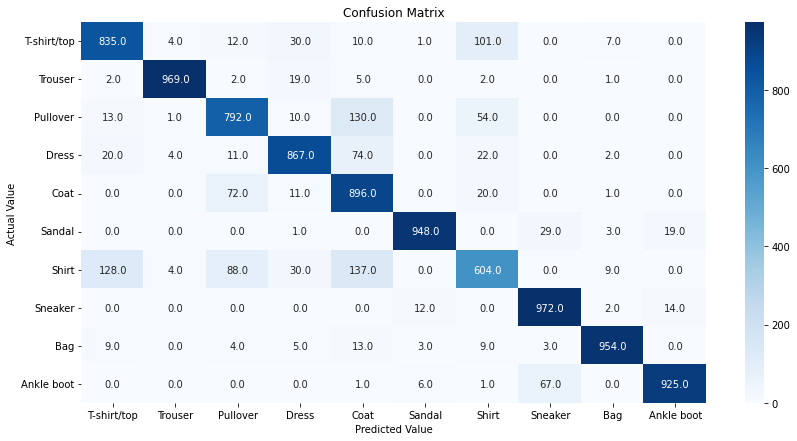

In [26]:
# Plotting the confusion matix
plt.figure(figsize=(14,7))
sns.heatmap(cm_df, annot=True, fmt='.1f', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [49]:
def plot_random_image(model, images, true_labels, classes):
  """
  picks a image plots it and labels it with a prediction and truth label.
  """
  # set a rando integer
  plt.figure(figsize=(20,10))
  for i in range(25):
    image = random.randint(0, len(images))

    # create a prediction and targets
    target_image = images[image]
    pred_probs = model.predict(target_image.reshape(1, 28 , 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[image]]

    #plot the image
    plt.subplot(5,5,i+1)
    plt.imshow(target_image, cmap=plt.cm.binary)
    plt.xticks([])

    # Change the color of title dpending upon if the prediction is wright or wrong
    if pred_label == true_label:
      color='green'
    else:
      color='red'

    # add Xlabel information (prediction / true label)
    plt.xlabel(f'Predicted: {pred_label} {round(pred_probs.max()*100,2)}%, True: {true_label}', color=color)
  plt.show()

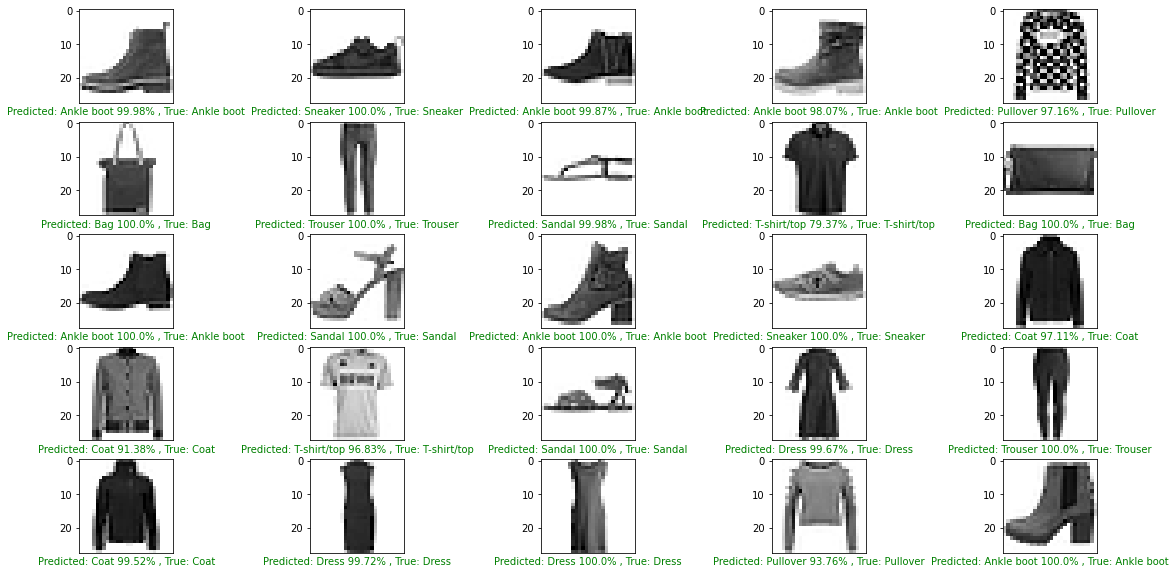

In [50]:
plot_random_image(model=model_4, images=test_data_norm, 
                  true_labels=test_labels, classes=class_name )

### What patterns our model is learning?


In [ ]:
model_4.layers

In [ ]:
model_4.layers[1]

In [ ]:
# Get the pattern of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.38819048, -0.22539634,  0.16348748, ..., -0.02273512,
          0.53187287, -0.8814381 ],
        [-0.5703444 , -0.169528  , -0.12244694, ...,  0.42785573,
          0.08684283,  0.44058552],
        [-0.2890431 ,  0.13273937, -0.71420634, ...,  0.09128264,
          0.6850572 , -0.53798395],
        ...,
        [ 0.56151694,  0.25821233, -0.6046453 , ...,  0.12984739,
          0.21285374,  0.23168184],
        [ 0.3520329 ,  0.66315246, -0.15086626, ...,  0.08715662,
          0.37614453, -0.46744633],
        [ 0.31378397, -0.00244916, -0.2401423 , ...,  0.8654337 ,
          0.93684906, -0.98700595]], dtype=float32), (784, 50))

In [ ]:
# Bias and Bias Shape
biases, biases.shape 

(array([ 0.708044  , -0.09879537,  0.275567  ,  1.186721  , -0.13967867,
         0.6404061 , -0.38934505,  0.6372057 , -0.18142408, -0.01360645,
         0.1268434 , -0.0148722 , -0.17502555,  0.57466984,  0.6558156 ,
         0.7934288 ,  0.75609213,  0.68531823,  0.51540095,  0.81746376,
         0.47664663, -0.04228739,  0.26167107,  0.8387714 , -0.41269007,
        -0.01190219,  0.9054522 ,  0.42760468,  0.8269951 , -0.16285643,
         0.10600433, -0.02170377,  0.6418028 , -0.35830227, -0.02117324,
        -0.39751968,  0.00199491,  0.28592435,  0.8829541 , -0.02526334,
         0.6172501 ,  0.6337771 ,  0.31255737,  0.44274586,  0.9473821 ,
        -0.24616197, -0.22703554, -0.30185524,  0.02430262,  0.42924884],
       dtype=float32), (50,))

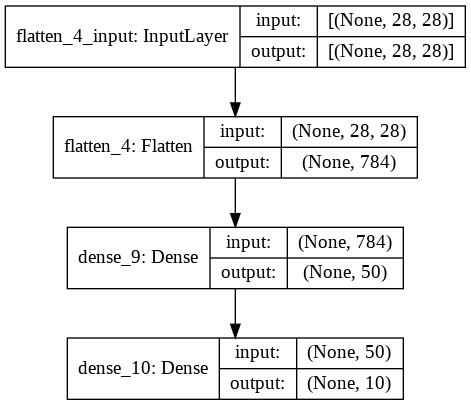

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)